#  Padulles Dynamic Model I

### Version 0.9

<p style="text-align:justify;">
The Padulles dynamic model can predict the transient response of cell voltage, temperature of the cell, hydrogen/oxygen out flow rates and cathode and anode channel temperatures/pressures under sudden change in load current. Hence, a dynamic fuel cell simulation is developed in this model, which incorporates the dynamics of flow and pressure in the anode and cathode channels and mass/ heat transfer transient features in the fuel cell body.
<br/>This model is based on several assumptions :    


<ol>    
<li>The stack is fed with hydrogen and air</li>   
<li>Cell temperature is stable at all times</li>   
<li>The ratio of pressures between the interior and exterior of the electrode channels is large</li>   
<li>The channels that transport gases along the electrodes have a fixed volume </li>    
<li>Only source of voltage loss is ohmic polarization</li>     
<li>Nernst equation can be applied too</li> 
</ol>

</p>

<p style="text-align:justify;">
In this model, Nernst and fuel cell potential were modeled as a function of oxygen and hydrogen gases partial pressure that can be calculated from independent variables or constants. The partial pressure of gases is proportional to the molar flow of each gas.
</p>

<div style="text-align:center;">
    
<img src="images/Padulles-Diagram.jpg">  
<p style="text-align:center;">Fig1. Padulles-1 Dynamic Model Block Diagram </p>
    
</div>

## Nernst Voltage

$$E_{Nernst}=N_0\times [E_0+\frac{RT}{2F}ln(P_{H_2}\times \sqrt{P_{O_2}})]$$

$$P_{H_2}=\frac{\frac{1}{K_{H_2}}}{1+\tau_{H_2}^{(s)}}[(q_{H_2}^{(inlet)}-(2\times K_r \times i)]$$

$$P_{O_2}=\frac{\frac{1}{K_{O_2}}}{1+\tau_{O_2}^{(s)}}[(q_{O_2}^{(inlet)}-(K_r \times i)]$$

$$K_r=\frac{N_0}{4F}$$

$$q_{O_2}^{(inlet)}=\frac{q_{H_2}^{(inlet)}}{r_{h-o}}$$

In [1]:
from opem.Dynamic.Padulles1 import Kr_Calc,qO2_Calc,PH2_Calc,PO2_Calc,Enernst_Calc

In [2]:
Kr=Kr_Calc(N0=88)
Kr

2.2801566260315118e-07

In [3]:
qO2=qO2_Calc(qH2=0.0004,rho=1.168)
qO2

0.0003424657534246576

In [4]:
PH2=PH2_Calc(KH2=0.0000422,tH2=3.37,Kr=Kr,I=1,qH2=0.0004)
PH2

2.166559852694447

In [5]:
PO2=PO2_Calc(KO2=0.0000211,tO2=6.74,Kr=Kr,I=1,qO2=qO2)
PO2

2.0955811367185566

In [6]:
Enernst=Enernst_Calc(E0=0.6,N0=88,T=343, PH2=PH2, PO2=PO2)
Enernst

54.28658891467849

### FC Voltage

$$V_{Fuelcell}=E_{Nernst}-Bln(Ci)-(R^{int}\times i)$$

In [7]:
from opem.Dynamic.Padulles1 import Vcell_Calc
FC_Voltage=Vcell_Calc(Enernst=Enernst, B=0.04777,C=0.0136,I=1,Rint=0.00303)
FC_Voltage

54.48885935035618

## Power of PEMFC

$$P=V_{cell}\times i$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [8]:
from opem.Dynamic.Padulles1 import Power_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=FC_Voltage,i=2)
Power

108.97771870071236

In [9]:
Power_Thermal_Calc(VStack=FC_Voltage,N=88,i=2)

107.50228129928763

## Efficiency of PEMFC

$$\eta=\frac{\mu_F\times V_{Fuelcell}}{N_0\times HHV}$$

In [10]:
from opem.Dynamic.Padulles1 import Efficiency_Calc
Efficiency_Calc(Vcell=FC_Voltage,N=88)

0.39691768174793257

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=0 to `i`=4 with `step`=0.1

In [11]:
Test_Vector={"T":343,"E0":0.6,"N0":88,"KO2":0.0000211,"KH2":0.0000422,"tH2":3.37,"tO2":6.74,"B":0.04777,"C":0.0136,"Rint":0.00303,"rho":1.168,"qH2":0.0004,"i-start":0,"i-stop":4,"i-step":0.1,"Name":"Test"}

* Notice : "Name", new in version 0.5

In [12]:
from opem.Dynamic.Padulles1 import Dynamic_Analysis
Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=False,ReportMode=False)

[Error] Vcell Calculation Error (Enernst:54.28850557413407, B:0.04777, C:0.0136, I:0, Rint:0.00303)
[Error] PEM Efficiency Calculation Failed (Vcell:None, N:88)
[Error] Power Calculation Error (Vcell:None, i:0)


{'EFF': [None,
  0.3977513543332525,
  0.39750655365258875,
  0.39736185898012566,
  0.3972581497084044,
  0.3971768980805572,
  0.3971098513395853,
  0.3970526072135646,
  0.39700253793845613,
  0.39695794855256433,
  0.39691768174793257,
  0.39688091206389015,
  0.3968470300107991,
  0.3968155727355017,
  0.3967861804549145,
  0.3967585679566162,
  0.39673250531602267,
  0.3967078044696878,
  0.3966843096322109,
  0.3966618903075967,
  0.39664043609530514,
  0.3966198527648516,
  0.3966000592444172,
  0.39658098527940633,
  0.3965625695896912,
  0.3965447584032809,
  0.3965275042777518,
  0.39651076514422556,
  0.3964945035252972,
  0.39647868589026086,
  0.39646328211968823,
  0.3964482650578333,
  0.39643361013612227,
  0.39641929505459833,
  0.3964052995109346,
  0.3963916049687393,
  0.39637819445850625,
  0.39636505240584513,
  0.3963521644826228,
  0.39633951747744234],
 'I': [0,
  0.1,
  0.2,
  0.3,
  0.4,
  0.5,
  0.6,
  0.7,
  0.8,
  0.9,
  1.0,
  1.1,
  1.2,
  1.3,
  1.4,
 

* Notice : "Status", "V0", "K" and "EFF" , new in version 0.8

In [13]:
Data=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Padulles-I-Model Simulation
###########
Analyzing . . .
[Error] Vcell Calculation Error (Enernst:54.28850557413407, B:0.04777, C:0.0136, I:0, Rint:0.00303)
[Error] PEM Efficiency Calculation Failed (Vcell:None, N:88)
[Error] Power Calculation Error (Vcell:None, i:0)
Done!


* Notice : "PrintMode" & "ReportMode" , new in version 0.5

In [14]:
Dynamic_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Padulles-I Simulation Failed!(Check Your Inputs)',
 'Status': False}

## Plot

In [15]:
import sys
!{sys.executable} -m pip install matplotlib;
import matplotlib.pyplot as plt

In [16]:
def plot_func(x,y,x_label,y_label,color='green'):
    plt.figure()
    plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


In [17]:
Test_Vector = {
    "T": 343,
    "E0": 0.6,
    "N0": 88,
    "KO2": 0.0000211,
    "KH2": 0.0000422,
    "tH2": 3.37,
    "tO2": 6.74,
    "B": 0.04777,
    "C": 0.0136,
    "Rint": 0.00303,
    "rho": 1.168,
    "qH2": 0.0004,
    "i-start": 0,
    "i-stop": 100,
    "i-step": 0.1,
    "Name": "PadullesI_Test"}
data=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=False,ReportMode=True)

[Error] Vcell Calculation Error (Enernst:54.28850557413407, B:0.04777, C:0.0136, I:0, Rint:0.00303)
[Error] PEM Efficiency Calculation Failed (Vcell:None, N:88)
[Error] Power Calculation Error (Vcell:None, i:0)


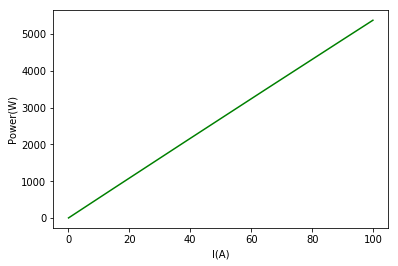

In [18]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

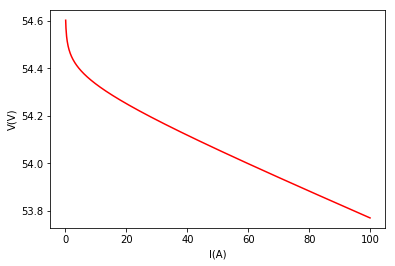

In [19]:
plot_func(data["I"],data["V"],"I(A)","V(V)","red")

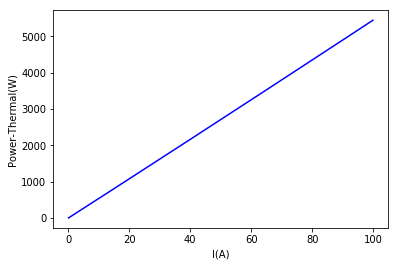

In [20]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

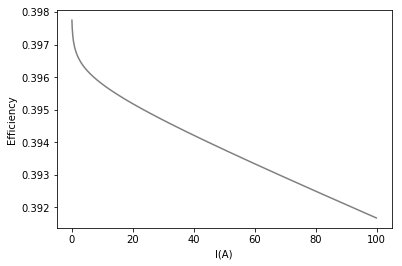

In [21]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

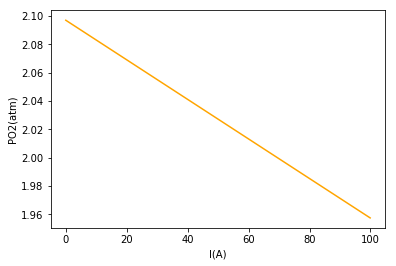

In [22]:
plot_func(data["I"],data["PO2"],"I(A)","PO2(atm)","orange")

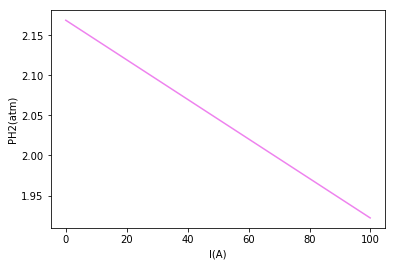

In [23]:
plot_func(data["I"],data["PH2"],"I(A)","PH2(atm)","violet")

<a href="Padulles-I/PadullesI_Test.html">HTML File</a>

<a href="Padulles-I/PadullesI_Test.opem">OPEM File</a>

<a href="Padulles-I/PadullesI_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User Input
2. System : Simulator Calculation (Middle Value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr> 
    <tr>
        <td>$$E_0$$</td>
        <td style="text-align:center;">No load voltage</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{O_2}$$</td>
        <td style="text-align:center;">Oxygen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{H_2}^{(s)}$$</td>
        <td style="text-align:center;">Hydrogen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{O_2}^{(s)}$$</td>
        <td style="text-align:center;">Oxygen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$B$$</td>
        <td style="text-align:center;">Activation voltage constant</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$C$$</td>
        <td style="text-align:center;">Activation constant parameter</td>
        <td>$$A^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$R^{int}$$</td>
        <td style="text-align:center;">FuelCell internal resistance</td>
        <td>$$\Omega$$</td>
        <td>$$User$$</td>
    </tr>
      <tr>
        <td>$$r_{h-o}$$</td>
        <td style="text-align:center;">Hydrogen-oxygen flow ratio</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
       <tr>
        <td>$$q_{H_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of hydrogen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{O_2}$$</td>
        <td style="text-align:center;">Oxygen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$K_r$$</td>
        <td style="text-align:center;">Modeling constant</td>
        <td>$$kmol.s^{-1}.A^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
      <tr>
        <td>$$q_{O_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of oxygen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
               <tr>
        <td>$$\mu_F$$</td>
        <td style="text-align:center;">The fuel utilization</td>
        <td>$$--$$</td>
        <td>$$0.95$$</td>
    </tr>
          <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher Heating Value Potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>
             <tr>
    <td>$$R$$</td>
        <td style="text-align:center;">Universal gas constant</td>
        <td>$$J.kmol^{-1}.K^{-1}$$</td>
        <td>$$8314.47$$</td>
    </tr>
             <tr>
    <td>$$F$$</td>
        <td style="text-align:center;">Faraday’s constant</td>
        <td>$$C.kmol^{-1}$$</td>
        <td>$$96484600$$</td>
    </tr>
    <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical Potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
    
    
    
</table>

## Reference
<blockquote>
J. Padulles, G.W. Ault, J.R. McDonald. 2000. "An integrated SOFC plant dynamic model for power systems
simulation." Journal of Power Sources (Elsevier) 86 (1-2): 495-500. doi:10.1016/S0378-7753(99)00430-9.
</blockquote>